In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
def get_test_metrics(classifier, name, filepath, text_file):
    acc = np.mean(classifier['test_acc'])
    brier = np.mean(classifier['test_brier'])
    auc = np.mean(classifier['test_auc'])
    balanced_acc = np.mean(classifier['test_balanced_acc'])
    std_balanced_acc = np.std(classifier['test_balanced_acc'])
    f1 = np.mean(classifier['test_f1'])
    precision = np.mean(classifier['test_precision'])
    recall = np.mean(classifier['test_recall'])
    tp = np.mean(classifier['test_tp'])
    tn = np.mean(classifier['test_tn'])
    fp = np.mean(classifier['test_fp'])
    fn = np.mean(classifier['test_fn'])

    text_file.write(f'{name} classifier accuracy: {acc}\n')
    text_file.write(f'{name} classifier brier score: {brier}\n')
    text_file.write(f'{name} classifier auc score: {auc}\n')
    text_file.write(f'{name} classifier balanced accuracy: {balanced_acc}\n')
    text_file.write(f'{name} classifier standard deviation of balanced accuracy: {std_balanced_acc}\n')
    text_file.write(f'{name} classifier f1 score: {f1}\n')
    text_file.write(f'{name} classifier precision: {precision}\n')
    text_file.write(f'{name} classifier recall: {recall}\n')
    text_file.write('\n')

    print(f'{name} classifier accuracy: {acc}')
    print(f'{name} classifier brier score: {brier}')
    print(f'{name} classifier auc score: {auc}')
    print(f'{name} classifier balanced accuracy: {balanced_acc}')
    print(f'{name} classifier standard deviation of balanced accuracy: {std_balanced_acc}')
    print(f'{name} classifier f1 score: {f1}')
    print(f'{name} classifier precision: {precision}')
    print(f'{name} classifier recall: {recall}')

    confusion_matrix = [[tn, fp], [fn, tp]]
    ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), xticklabels=['Healthy', 'CI'], yticklabels=['Healthy', 'CI'], annot=True, fmt='.2%', square=True, cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(name)
    plt.savefig(filepath + f'{name}_conf_matrix.png', dpi=600)

    fig, ax = plt.subplots(dpi=600, sharex=True)
    for array in classifier.hist(column=['train_acc', 'test_acc'], ax=ax, alpha=0.5, width=0.01):
        for subplot in array:
            subplot.set_xlim((0.5,1))
            subplot.set_xlabel("Accuracy")
            subplot.set_ylabel("Number of folds")
    plt.suptitle(name, ha='center', fontsize='xx-large')
    plt.savefig(filepath + f'{name}_train_test_acc.png', dpi=600)
    
    return acc, brier, auc, balanced_acc, f1, precision, recall, confusion_matrix

In [11]:
filepath = "../results/Benfatto/6s_segments/ml_comparison/StratifiedGroupKFold/"
features = "all_features"
text_file = open(filepath + features + "/" + "Result.txt", "w")

dummy classifier accuracy: 0.6796650592055005
dummy classifier brier score: -0.21967798229957267
dummy classifier auc score: 0.5
dummy classifier balanced accuracy: 0.5
dummy classifier standard deviation of balanced accuracy: 0.0
dummy classifier f1 score: 0.8057346717582778
dummy classifier precision: 0.6796650592055005
dummy classifier recall: 1.0


C:\Users\aneta.kartali\AppData\Local\Temp\ipykernel_3408\36545562.py:42: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  for array in classifier.hist(column=['train_acc', 'test_acc'], ax=ax, alpha=0.5, width=0.01):


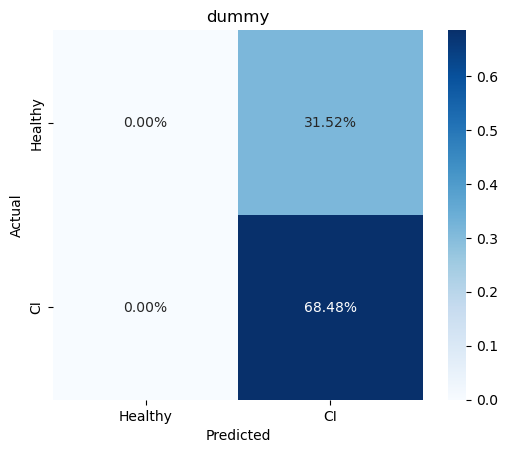

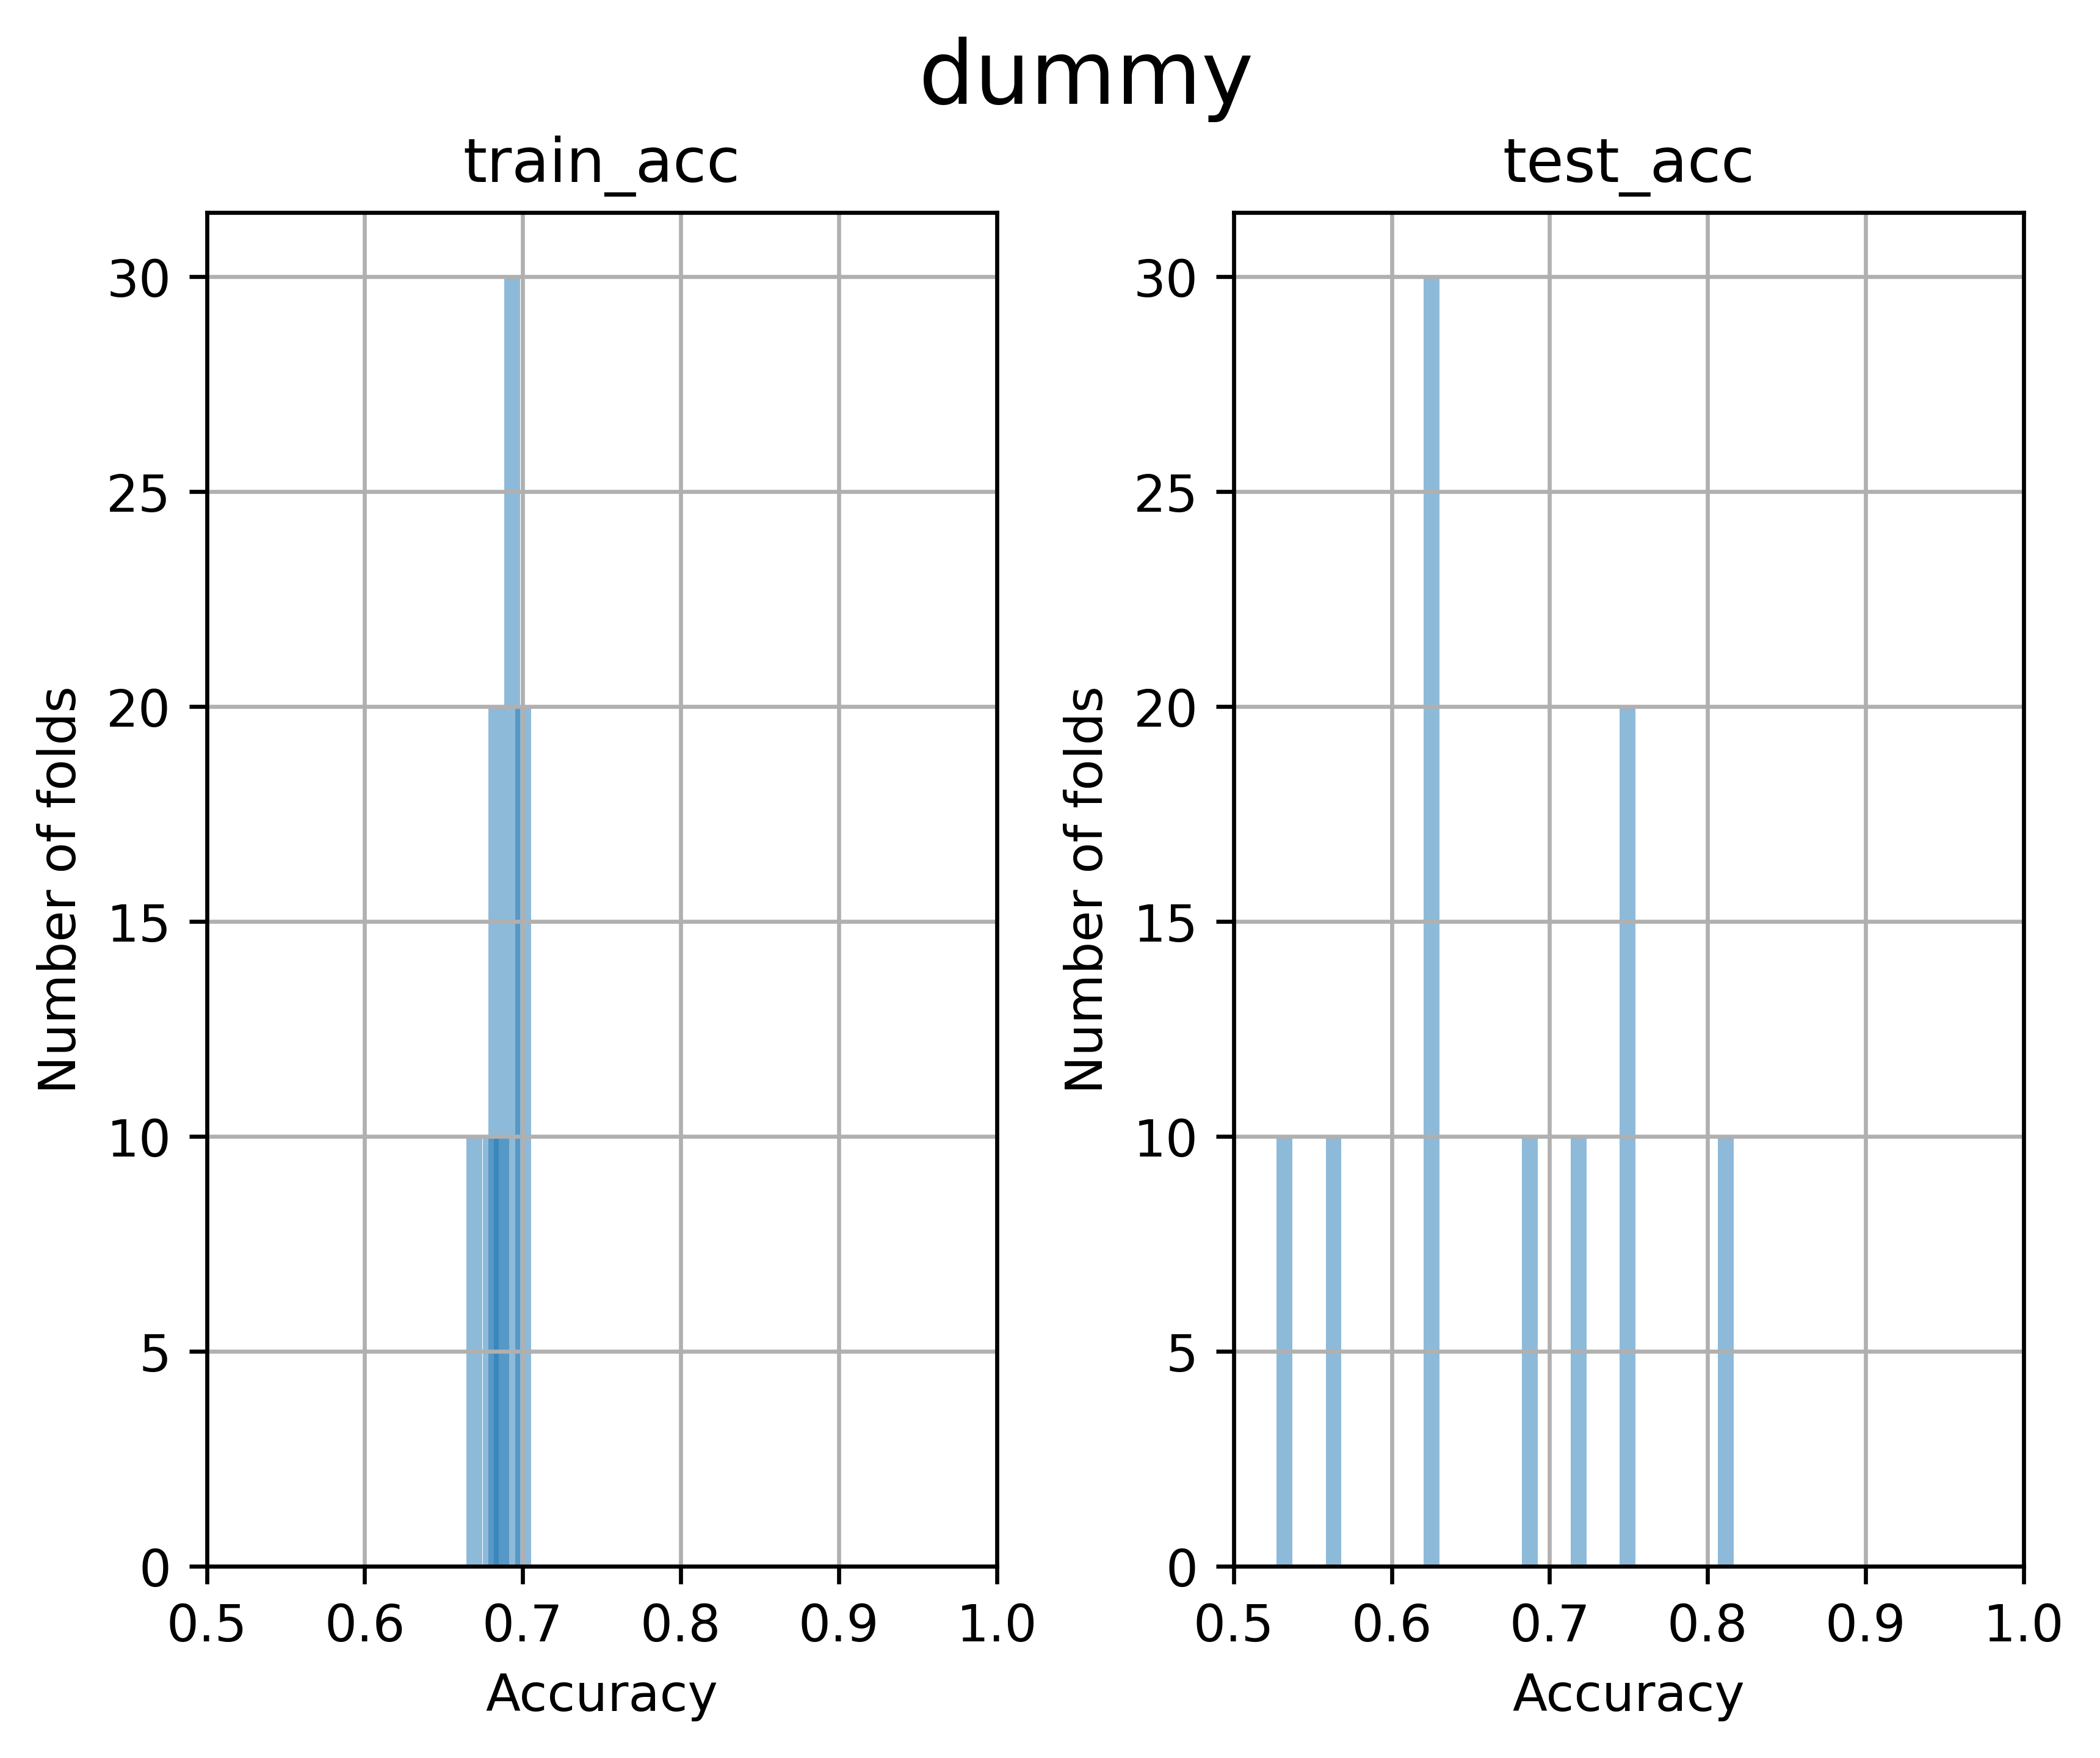

In [12]:
filename = 'dummy-reading.csv'
dummy = pd.read_csv(filepath + features + "/" + filename)
dummy_acc, dummy_brier, dummy_auc, dummy_balanced_acc, dummy_f1, dummy_precision, dummy_recall, dummy_confusion_matrix = get_test_metrics(dummy, 'dummy', filepath, text_file)

LR classifier accuracy: 0.8984383488243782
LR classifier brier score: -0.0826108094040327
LR classifier auc score: 0.948336961156922
LR classifier balanced accuracy: 0.8818815791524015
LR classifier standard deviation of balanced accuracy: 0.05890353928996626
LR classifier f1 score: 0.9237346303911131
LR classifier precision: 0.9086236364502106
LR classifier recall: 0.944221759863223


C:\Users\aneta.kartali\AppData\Local\Temp\ipykernel_3408\36545562.py:42: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  for array in classifier.hist(column=['train_acc', 'test_acc'], ax=ax, alpha=0.5, width=0.01):


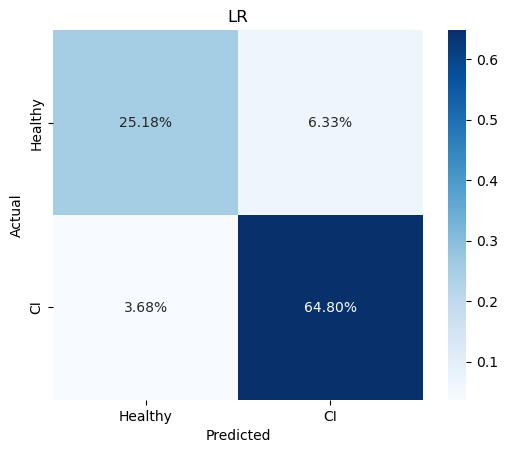

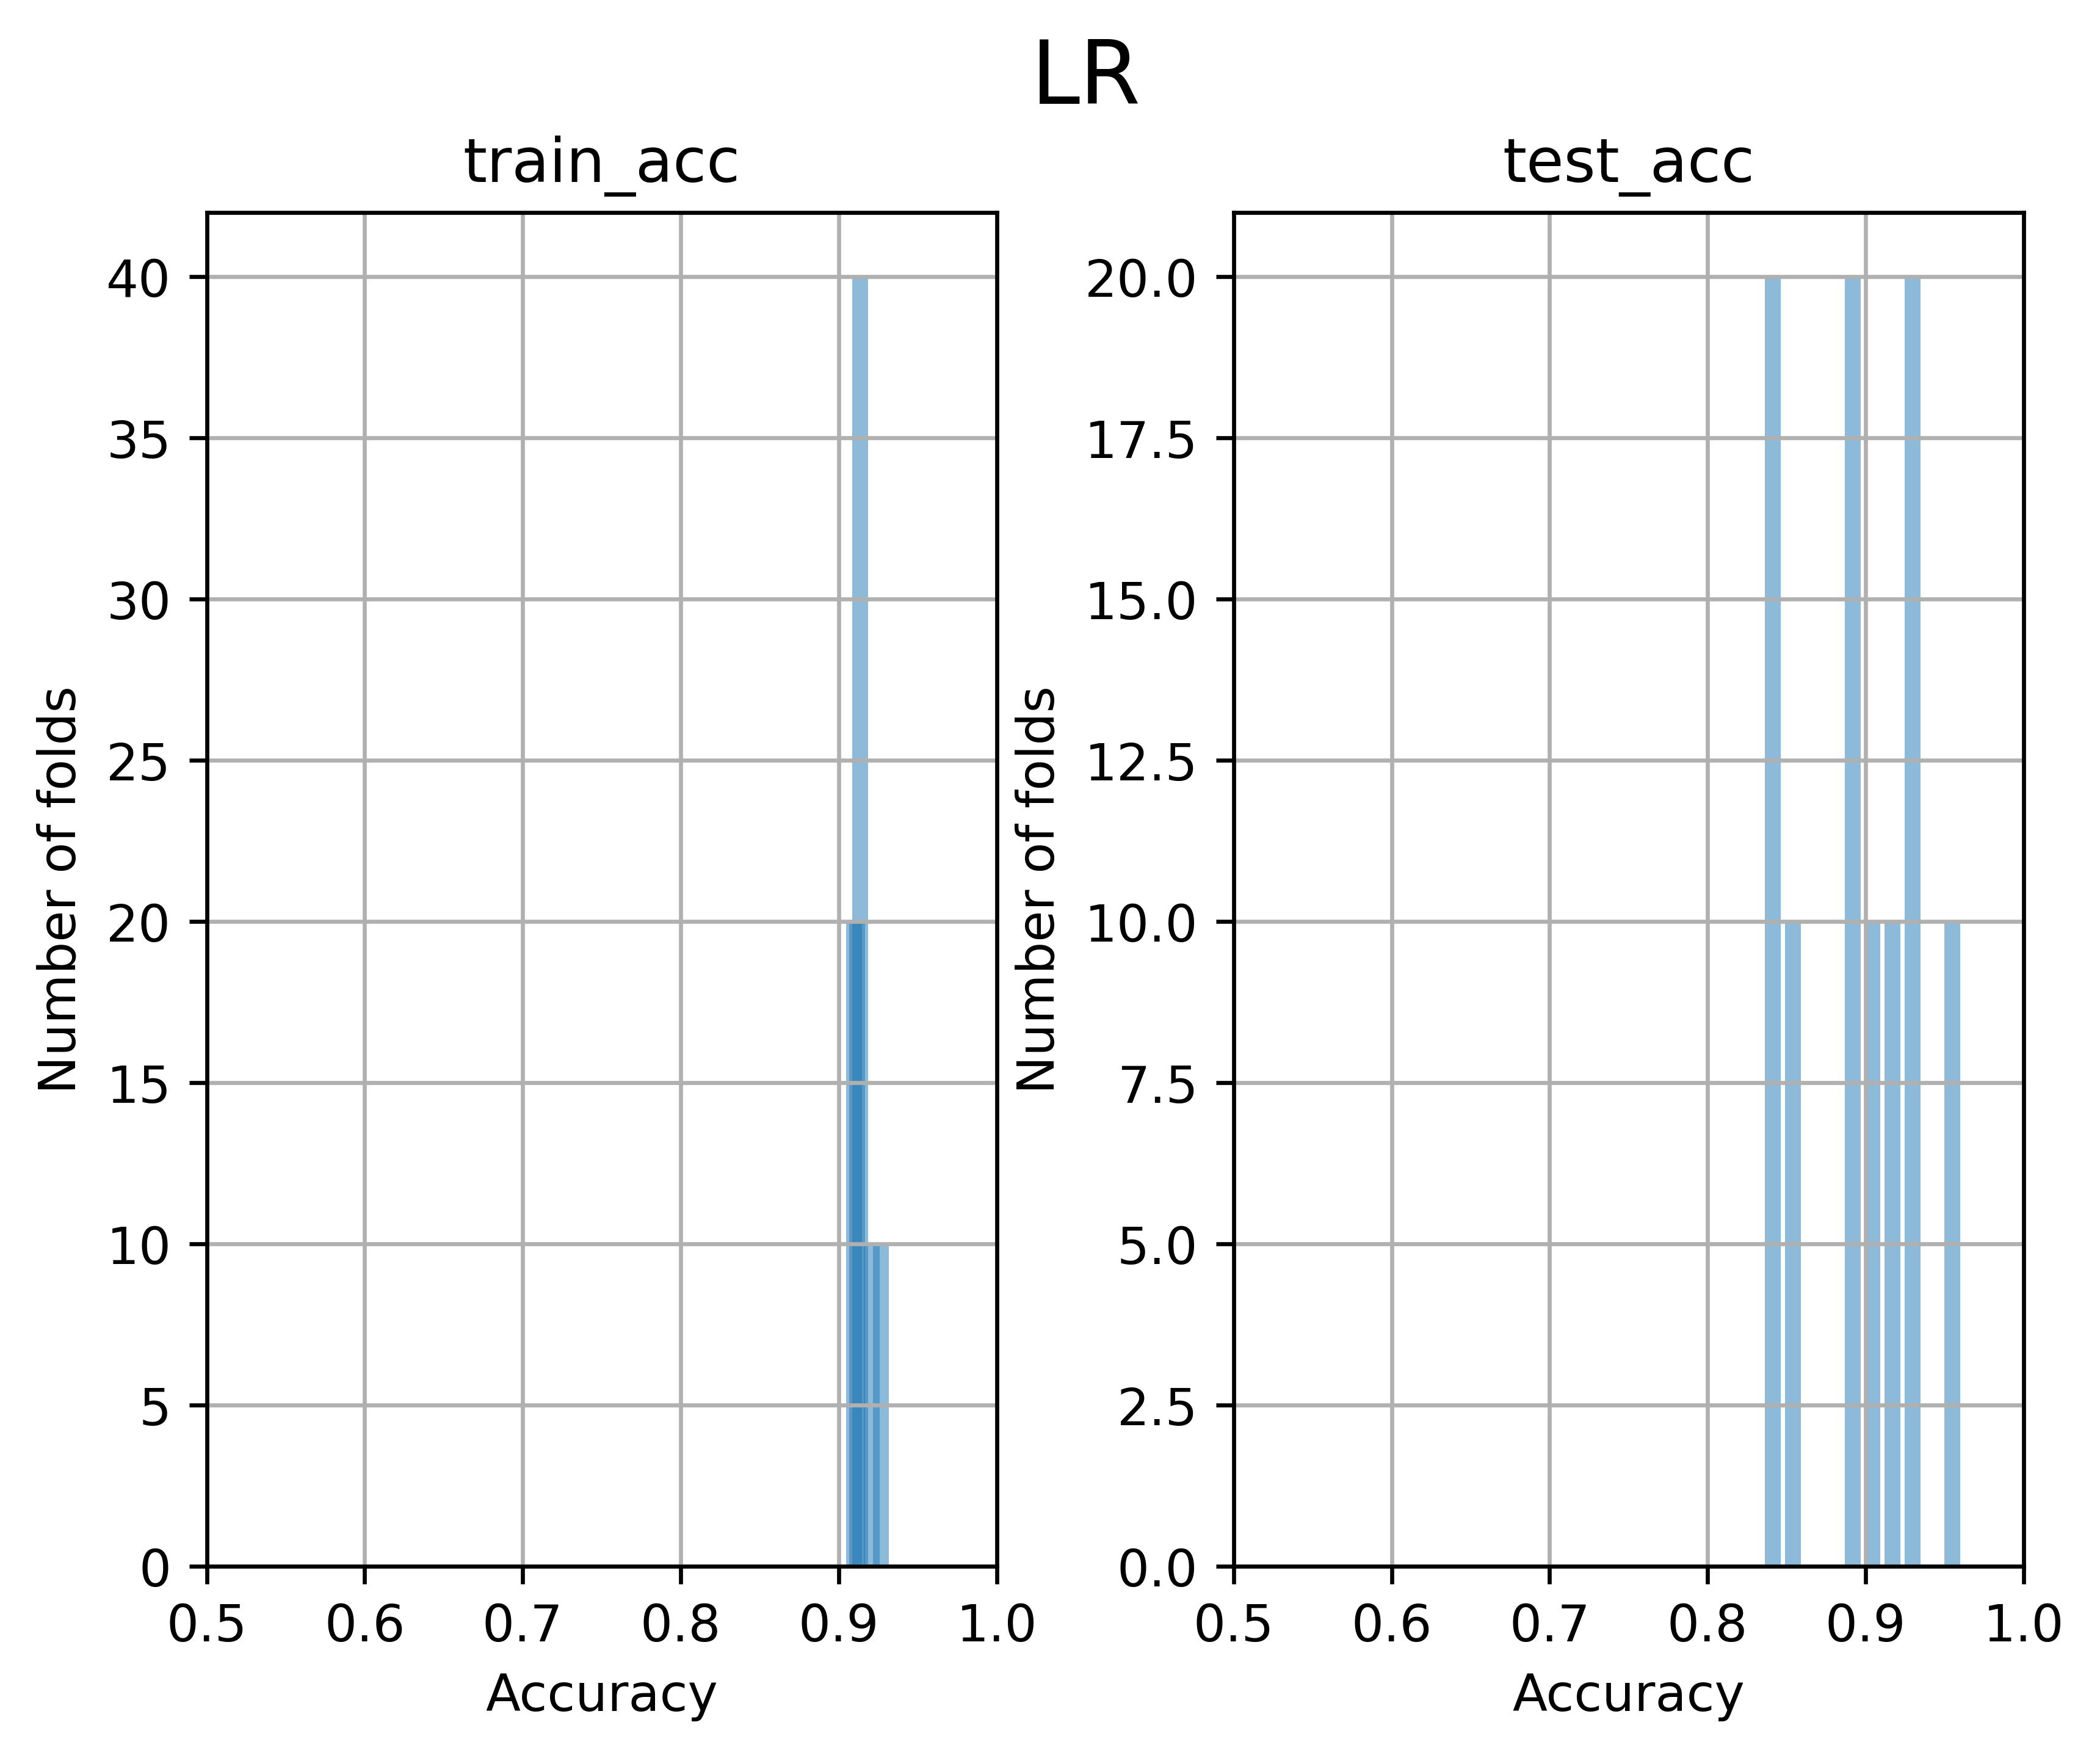

In [13]:
filename = 'lr-reading.csv'
lr = pd.read_csv(filepath + features + "/" + filename)
lr_acc, lr_brier, lr_auc, lr_balanced_acc, lr_f1, lr_precision, lr_recall, lr_confusion_matrix = get_test_metrics(lr, 'LR', filepath, text_file)

In [ ]:
filename = 'nb-reading.csv'
nb = pd.read_csv(filepath + features + "/" + filename)
nb_acc, nb_brier, nb_auc, nb_balanced_acc, nb_f1, nb_precision, nb_recall, nb_confusion_matrix = get_test_metrics(nb, 'NB', filepath, text_file)

In [ ]:
filename = 'xgb-reading.csv'
xgb = pd.read_csv(filepath + features + "/" + filename)
xgb_acc, xgb_brier, xgb_auc, xgb_balanced_acc, xgb_f1, xgb_precision, xgb_recall, xgb_confusion_matrix = get_test_metrics(xgb, 'XGB', filepath, text_file)

In [ ]:
filename = 'rf-reading.csv'
rf = pd.read_csv(filepath + features + "/" + filename)
rf_acc, rf_brier, rf_auc, rf_balanced_acc, rf_f1, rf_precision, rf_recall, rf_confusion_matrix = get_test_metrics(rf, 'RF', filepath, text_file)

In [14]:
text_file.close()